In [29]:
## Importar Librerias

import pandas as pd
import seaborn as sns

In [6]:
## Como leer archivos planos 

datos = pd.read_csv(r"C:\Users\ViG\Desktop\comics.csv")
datos.head()

,name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
0,Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NaN,Living Characters,4043.0,Aug-62,marvel
1,Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NaN,Living Characters,3360.0,Mar-41,marvel
2,"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NaN,Living Characters,3061.0,Oct-74,marvel
3,"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NaN,Living Characters,2961.0,Mar-63,marvel
4,Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NaN,Living Characters,2258.0,Nov-50,marvel


In [8]:
datos.groupby( by = "id"). size()

## Use of the group by Fuction

id
No Dual    1788
Public     6994
Secret     8698
Unknown       9
dtype: int64

In [9]:
datos.groupby( by = "align"). size()

align
Bad                   9615
Good                  7468
Neutral               2773
Reformed Criminals       3
dtype: int64

In [11]:
datos.groupby( by = "eye"). size()

eye
Amber Eyes              15
Auburn Hair              7
Black Eyeballs           3
Black Eyes             967
Blue Eyes             3064
Brown Eyes            2803
Compound Eyes            1
Gold Eyes               23
Green Eyes             904
Grey Eyes              135
Hazel Eyes              99
Magenta Eyes             2
Multiple Eyes            7
No Eyes                  7
One Eye                 21
Orange Eyes             35
Photocellular Eyes      48
Pink Eyes               27
Purple Eyes             45
Red Eyes               716
Silver Eyes             12
Variable Eyes           49
Violet Eyes             23
White Eyes             516
Yellow Eyeballs          6
Yellow Eyes            342
dtype: int64

In [13]:
datos.groupby( by = "hair"). size()

hair
Auburn Hair                78
Bald                      838
Black Hair               5329
Blond Hair               2326
Blue Hair                  97
Bronze Hair                 1
Brown Hair               3487
Dyed Hair                   1
Gold Hair                  13
Green Hair                159
Grey Hair                 688
Light Brown Hair            6
Magenta Hair                5
No Hair                  1176
Orange Hair                64
Orange-brown Hair           3
Pink Hair                  42
Platinum Blond Hair         2
Purple Hair                79
Red Hair                 1081
Reddish Blond Hair          6
Reddish Brown Hair          3
Silver Hair                19
Strawberry Blond Hair      75
Variable Hair              32
Violet Hair                 4
White Hair               1100
Yellow Hair                20
dtype: int64

In [14]:
datos.groupby( by = "gender"). size()

gender
Female     5804
Male      16421
Other        68
dtype: int64

In [15]:
datos.groupby( by = "publisher"). size()

publisher
dc         6896
marvel    16376
dtype: int64

In [18]:
## Creacion de tablas cruzadas para obtener datos especificos, con filas y columnas, donde el publicador serian las columnas

pd.crosstab(datos.id, datos.publisher, 
            margins = True,
            margins_name = 'Total')

publisher,dc,marvel,Total
id,,,
No Dual,0,1788,1788
Public,2466,4528,6994
Secret,2408,6290,8698
Unknown,9,0,9
Total,4883,12606,17489


In [19]:
## Agregar parametro extra para omitir valores nulos

pd.crosstab(datos.id, datos.publisher, 
            margins = True,
            margins_name = 'Total' ,
            dropna=False)

publisher,dc,marvel,Total
id,,,
No Dual,0,1788,1788
Public,2466,4528,6994
Secret,2408,6290,8698
Unknown,9,0,9
Total,6896,16376,23272


In [20]:
## Determinar si los comics de marval tieden a exterminar sus personajes o identificar si es DC, Se utiliza una tabla cruzada

pd.crosstab(datos.alive, datos.publisher, 
            margins = True,
            margins_name = 'Total')

publisher,dc,marvel,Total
alive,,,
Deceased Characters,1693,3765,5458
Living Characters,5200,12608,17808
Total,6893,16373,23266


In [23]:
## Calcular porcentajes tabla cruzada, utilzando el parametro de normalize, se cierra parentesis desde el inicio 

(pd.crosstab(datos.alive, datos.publisher, 

            normalize = 'columns') * 100).round(1)

publisher,dc,marvel
alive,,
Deceased Characters,24.6,23.0
Living Characters,75.4,77.0


In [24]:
## Porcentaje con respecto al valor de las filas, el porcetaje se asocia con respecto a las filas 

(pd.crosstab(datos.alive, datos.publisher, 

            normalize = 'index') * 100).round(1)


publisher,dc,marvel
alive,,
Deceased Characters,31.0,69.0
Living Characters,29.2,70.8


In [34]:
## Graficar valores cualitativos entre dos variables, se puede utilziar el grafico de la libreria de Seaborn y crosstap de la libreria de Pandas
## Mapa de calor

#sns.heatmap(pd.crosstab(datos.alive,datos.publisher),
           #cmap='YIGnBu',
            #annot = True,
            #cbar = False) 



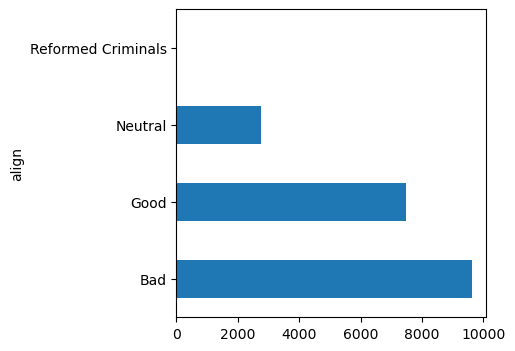

In [35]:
## Grafico para explorar variables, grafico de barras

ax = datos.groupby(by='align').size().plot.barh(figsize=(4,4), legend = False)

<Axes: ylabel='id'>

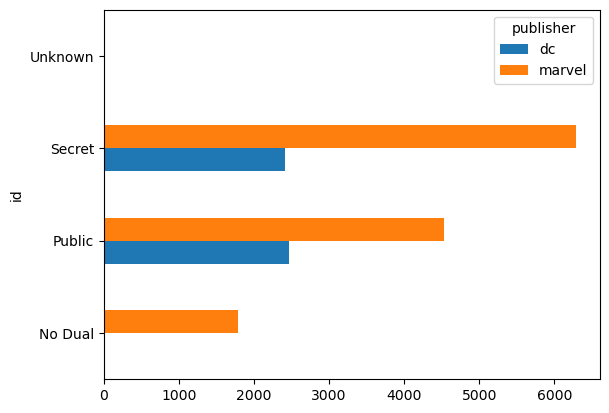

In [36]:
## Graficar tablas cruzamente, primeramente se crea un objeto

graficos1 = pd.crosstab(datos.id,datos.publisher)
graficos1.plot.barh()

<Axes: ylabel='alive'>

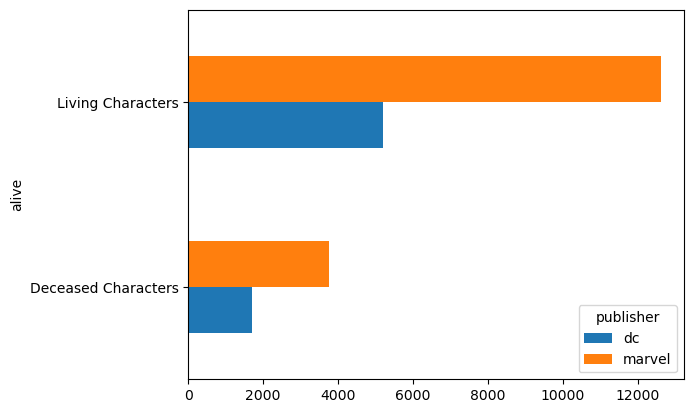

In [37]:
## Grafico 2 personajes con vida o sin vida

graficos1 = pd.crosstab(datos.alive,datos.publisher)
graficos1.plot.barh()

<Axes: ylabel='publisher'>

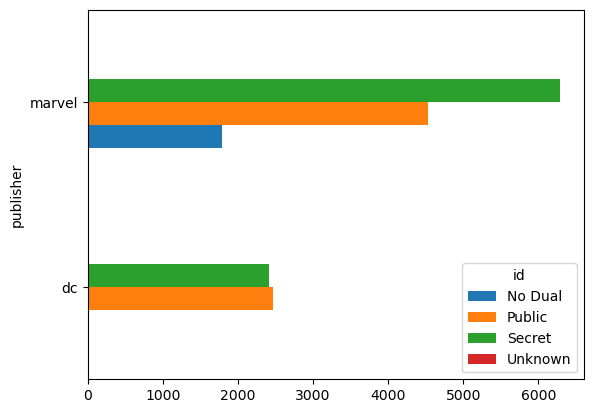

In [39]:
## Invertir los valores para identificar relaciones entre las variables 

graficos1_1 = pd.crosstab(datos.publisher,datos.id)
graficos1_1.plot.barh()

<Axes: ylabel='alive'>

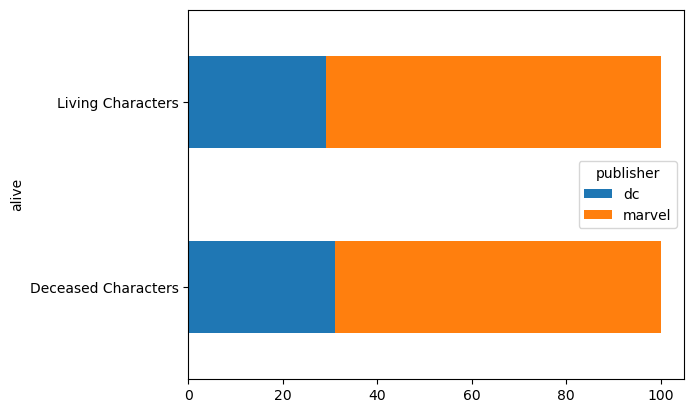

In [42]:
## Distribucion Porcentual , para graficar 
## Se crea el objeto
## Lamdba aplica una funcion especifica al objeto que se llama

datos_porcentuales_grafico = graficos1.apply(lambda x: (x*100) /sum(x),axis=1)
datos_porcentuales_grafico.plot.barh(stacked=True)

<Axes: ylabel='publisher'>

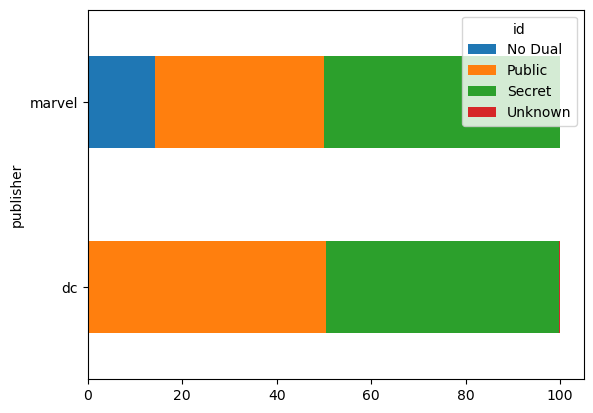

In [44]:
datos_porcentuales_grafico = graficos1_1.apply(lambda x: (x*100) /sum(x),axis=1)
datos_porcentuales_grafico.plot.barh(stacked=True)

In [46]:
##Crear un filtro para filtrar datos, primeramente se debe espeficificar un objeto

datos_filtrados = datos[datos.id.isin(['Secret' , 'Public'])]
datos_filtrados


,name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
0,Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NaN,Living Characters,4043.0,Aug-62,marvel
1,Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NaN,Living Characters,3360.0,Mar-41,marvel
2,"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NaN,Living Characters,3061.0,Oct-74,marvel
3,"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NaN,Living Characters,2961.0,Mar-63,marvel
5,Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NaN,Living Characters,2255.0,Nov-61,marvel
...,...,...,...,...,...,...,...,...,...,...,...
23267,Nadine West (New Earth),Public,Good,NaN,NaN,Female,NaN,Living Characters,NaN,NaN,dc
23268,Warren Harding (New Earth),Public,Good,NaN,NaN,Male,NaN,Living Characters,NaN,NaN,dc
23269,William Harrison (New Earth),Public,Good,NaN,NaN,Male,NaN,Living Characters,NaN,NaN,dc
23270,William McKinley (New Earth),Public,Good,NaN,NaN,Male,NaN,Living Characters,NaN,NaN,dc


<Axes: ylabel='id'>

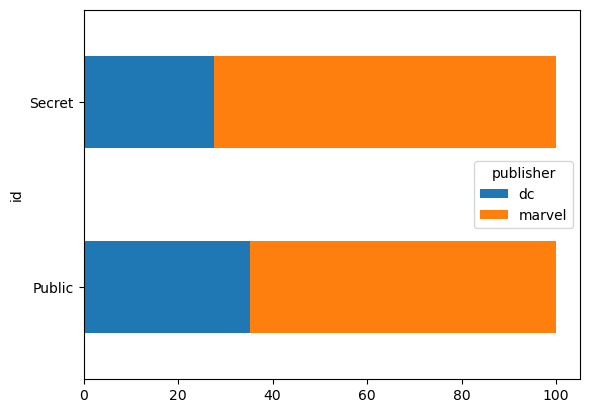

In [47]:
## Verificacion graficar de haber omitido la categoria filtrada

grafico1_1 = pd.crosstab(datos_filtrados.id,datos_filtrados.publisher)
datos_porcentuales_grafico = grafico1_1.apply(lambda x: (x*100)/sum(x),axis=1)
datos_porcentuales_grafico.plot.barh(stacked=True)

